In [2]:
import numpy as np
import matplotlib.pylab as plt
from pandas_ml import ConfusionMatrix
import sys
sys.path.insert(0, '../zdrojaky/logreg')
from logreg import LogReg

# Logistická regrese

Praktickou ukázkou použití logistické regrese (nebo libovolné jiné vhodné klasifikační metody) je určování, zda daný pixel získaný z fotografie obličeje patří ke kůži (Skin) či nikoliv (NonSkin). Pro testování algorimů se využívá databáze *Skin Segmentation Dataset* (Bhatt & Dhall) získaná náhodným vzorkováním RGB (Red-Green-Blue) hodnot pixelů z obličejů různých věkových skupin (young-middle-old) a rasových skupin (white-black-asian) z databází FERET a PAL. Dataset obsahuje celkem 245 057 řádků s hodnotami B, G, R a příslušností k třídě Skin (1) resp. NonSkin (2). Z toho je 194 198 vzorků NonSkin a 50 859 Skin. V tomto příkladu použijeme 1000 náhodně vybraných vzorků a sekvenčně je zkusíme oklasifikovat logistickou regresí.

Tři náhodně vybrané datové řádky:

    ---
    B, G, R, Class
    242, 169, 161,   2
    218, 211, 202,   2
    110, 150, 209,   1
    ---
    
**Použijeme regresor ve tvaru $x_t = [1, B_t, G_t, R_t]$, normální apriorní distribuci $\mathcal{N}$(**_0_**, 100**_I_**) a mez _m_=0.5.**

Nejprve načteme data. Protože jsou uspořádána, náhodně je promícháme.

In [3]:
np.random.seed(1234)
ndat = 1000

fn = 'Skin_NonSkin.txt'
data = np.loadtxt(fn)
np.random.shuffle(data)

print(data[:3])

[[242. 169. 161.   2.]
 [218. 211. 202.   2.]
 [110. 150. 209.   1.]]


In [5]:
data[:,-1][:3]

array([2., 2., 1.])

Všimněte si, že třídy jsou oklasifikovány jako 1 a 2 (Skin a NonSkin). 


**Úkol 1: Musíme tedy od posledního sloupce odečíst jedničku.**


**Úkol 2: Rozdělte data na regresory (BGR) - proměnná `X` a třídy - proměnná `y`. Upravte regresor, aby odpovídal požadované podobě (sloupec jedniček).**

In [6]:
X = np.ones(shape=data.shape)
X[:,1:] = data[:,:-1]
y = np.copy(data[:,-1]) - 1

Nadefinujeme si apriorno jako $\mathcal{N}([0, 0, 0, 0], 100I_{4\times 4}).$

In [7]:
#%% Prior
mean = np.zeros(X.shape[-1])
Sigma = np.eye(X.shape[-1]) * 100.
prior = LogReg(mean=mean, Sigma=Sigma)

Pustíme odhad - apriorno updatujeme vždy o jeden regresor a pozorovanou třídu (Skin-NonSkin)

In [8]:
#%% Estimation
for xt, yt in zip(X, y):
    prior.update(yt, xt)
    prior.log()
    

Vykreslíme si vývoj Brierova skore.

Text(0,0.5,'Brier score')

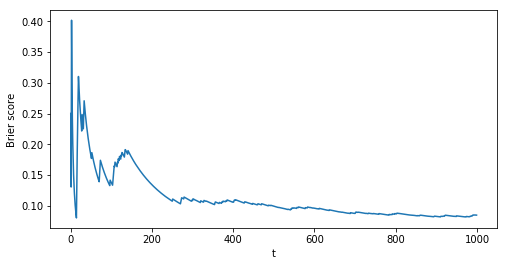

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(prior.brier_score_log[:1000])
plt.xlabel('t')
plt.ylabel('Brier score')

A spočteme matici záměn.

In [10]:
#%% Confusion matrix
CM = ConfusionMatrix(prior.true_vals, prior.binary_preds)
CM.print_stats()

population: 245057
P: 194198
N: 50859
PositiveTest: 192242
NegativeTest: 52815
TP: 183243
TN: 41860
FP: 8999
FN: 10955
TPR: 0.943588502456256
TNR: 0.8230598320847834
PPV: 0.9531892094339426
NPV: 0.7925778661365143
FPR: 0.17694016791521658
FDR: 0.046810790566057366
FNR: 0.05641149754374401
ACC: 0.9185740460382686
F1_score: 0.9483645585343132
MCC: 2.669239230005943
informedness: 0.7666483345410393
markedness: 0.7457670755704568
prevalence: 0.7924605295910747
LRP: 5.332811161953853
LRN: 0.06853875665497555
DOR: 77.80723523771013
FOR: 0.20742213386348576


/home/users/b/bartyrad/bml/env-bml/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: overflow encountered in long_scalars
  (self.TN + self.FP) * (self.TN + self.FN)))
